In [1]:
import numpy as np
import matplotlib.pyplot as plt

from gisaug.augmentations import DropRandomPoints, Stretch, DropRandomRegions, ChangeAmplitude

np.random.seed(73)

# A toy example curve for augmentations

In [2]:
def batman(x):
    """Curve with a form of Batman's head. Works for `x` from -25 to 25"""
    
    from scipy import stats
    
    if abs(x) >= 25:
        return 0
    
    if x > 0:
        return batman(-x)
    
    if x <= -20:
        return np.exp(x + 20) - 0.007
    
    elif -20 < x <= -14:
        return -x / 6 - 14 / 6
    
    elif -14 < x <= 14:
        return stats.norm(0, 10).pdf(x) * 5 - 0.07
    
    else:
        return np.exp(-x - 20)

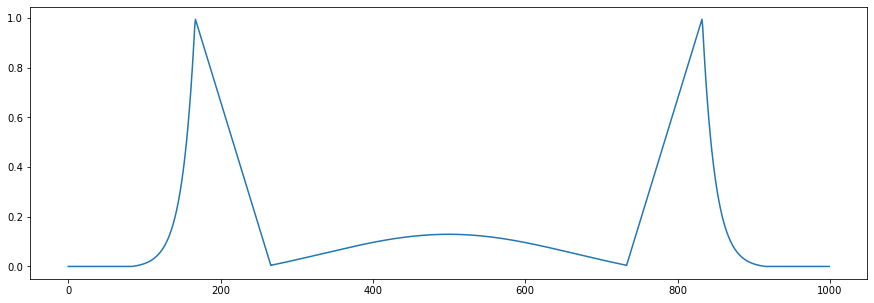

In [3]:
curve = np.array([batman(x_i) for x_i in np.linspace(-30, 30, 1000)])

plt.figure(figsize=(15, 5))
plt.plot(curve);

# How to use augmentations

### Provide a number as a parameter

In [4]:
augmentation = DropRandomPoints(p=0.5)  # Keep 50% of random points
augmented_curve = augmentation(curve)

### Provide an interval as a parameter

In [5]:
augmentation = DropRandomPoints(p=[0.3, 0.7])  # Keep 30-70% of random points. Choose p randomly on each run
augmented_curve = augmentation(curve)

# Visualization of the augmentations

You can easily visualize original and augmented curves with the method `visualize`. Both horizontal and vertical plots are supported

**DropRandomPoints** augmentation makes the curve shorter. Its parameter `p` means the relative length of the augmented curve to the original one. For example, if length of a curve is 100 points and `p=0.3`, the augmented curve will contain ~ 30 points

array([<AxesSubplot:title={'center':'Original curve'}>,
       <AxesSubplot:title={'center':'Augmented curve'}>,
       <AxesSubplot:title={'center':'Curves together'}>], dtype=object)

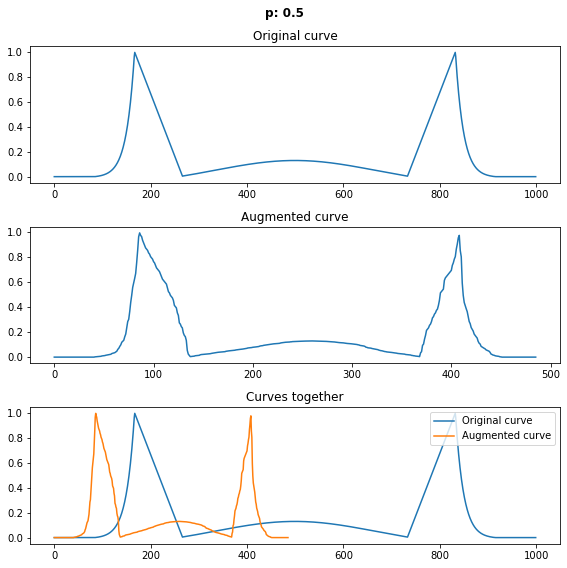

In [6]:
augmentation = DropRandomPoints(0.5)

augmentation.visualize(curve, vertical=False)

array([<AxesSubplot:title={'center':'Original curve'}>,
       <AxesSubplot:title={'center':'Augmented curve'}>,
       <AxesSubplot:title={'center':'Curves together'}>], dtype=object)

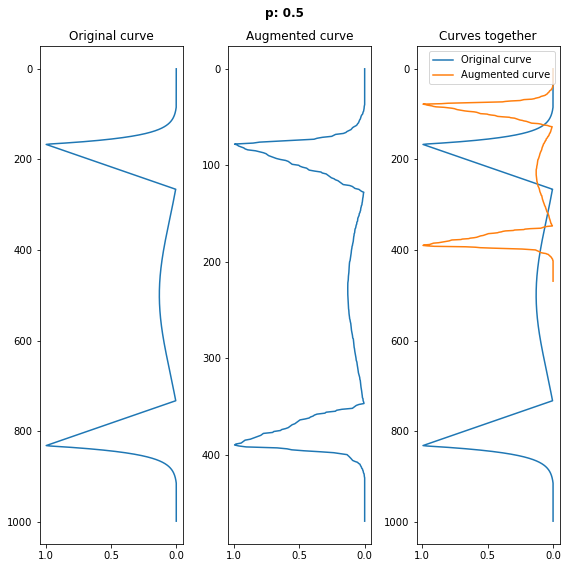

In [7]:
augmentation = DropRandomPoints(0.5)

augmentation.visualize(curve, vertical=True)

In [8]:
print("Length of the original curve:", len(curve))
print("Length of the augmented curve:", len(augmentation(curve)))

Length of the original curve: 1000
Length of the augmented curve: 500


If you set an interval as a parameter, result of the augmentation is different on each run. You can see the used parameter value in the title of a plot

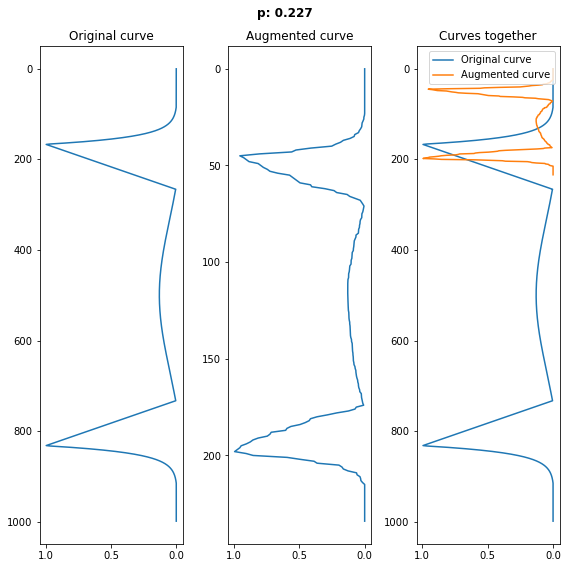

In [9]:
augmentation = DropRandomPoints(p=[0.1, 0.8])

augmentation.visualize(curve);

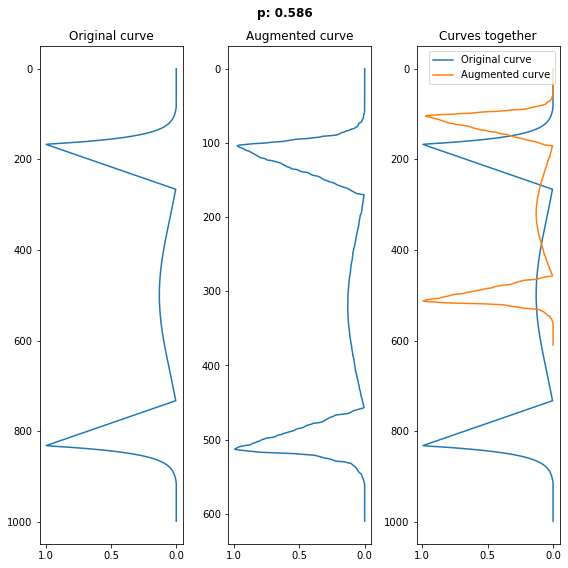

In [10]:
augmentation.visualize(curve);

**Stretch** augmentation makes the curve longer. Its parameter `c` means the relative length of the augmented curve to the original one. For example, if length of a curve is 100 points and `c=2.5`, the augmented curve will contain ~ 250 points

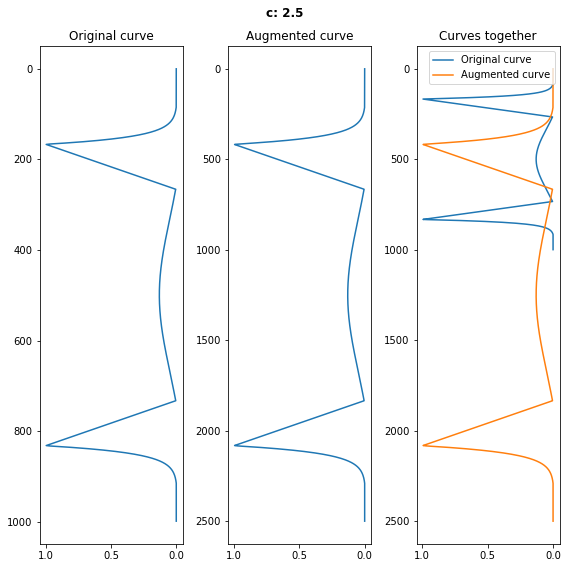

In [11]:
stretch_augmentation = Stretch(c=2.5)
stretch_augmentation.visualize(curve);

In [12]:
print("Length of the original curve:", len(curve))
print("Length of the augmented curve:", len(stretch_augmentation(curve)))

Length of the original curve: 1000
Length of the augmented curve: 2500


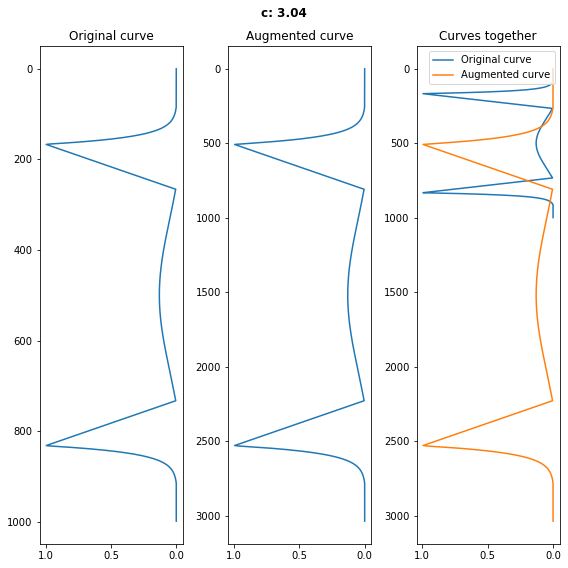

In [13]:
stretch_augmentation = Stretch(c=[1.5, 4])
stretch_augmentation.visualize(curve);

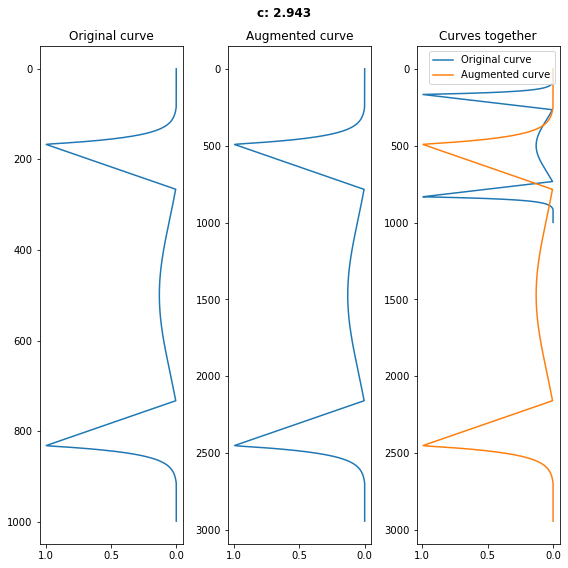

In [14]:
stretch_augmentation.visualize(curve);

**DropRandomRegions** augmentation makes the curve shorter by removingrandom regions from the curve. Its parameter `p` means the relative length of the dropping region to the original one. For example, if `p = 0.25`, a quarter of the curve will be dropped. Parameter `k` means number of the regions dropped. For example, if `p = 0.25` and `k = 2`, a quarter of the curve will be dropped, and then a quarter of new curve will be dropped again 

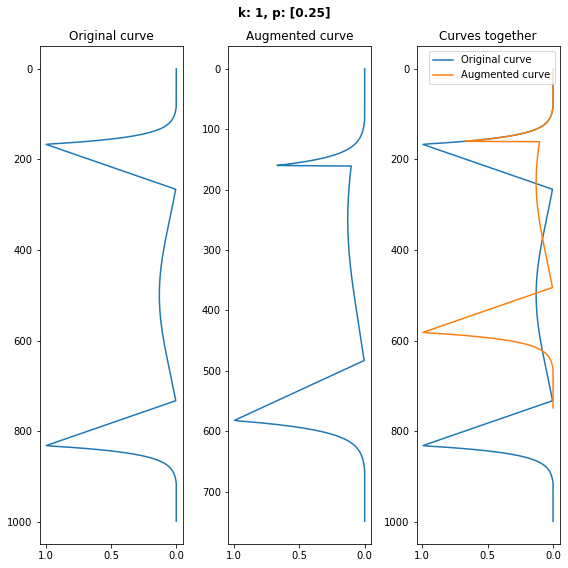

In [15]:
drop_regions_augmentation = DropRandomRegions(p=0.25, k=1)
drop_regions_augmentation.visualize(curve);

In [16]:
print("Length of the original curve:", len(curve))
print("Length of the augmented curve:", len(drop_regions_augmentation(curve)))

Length of the original curve: 1000
Length of the augmented curve: 750


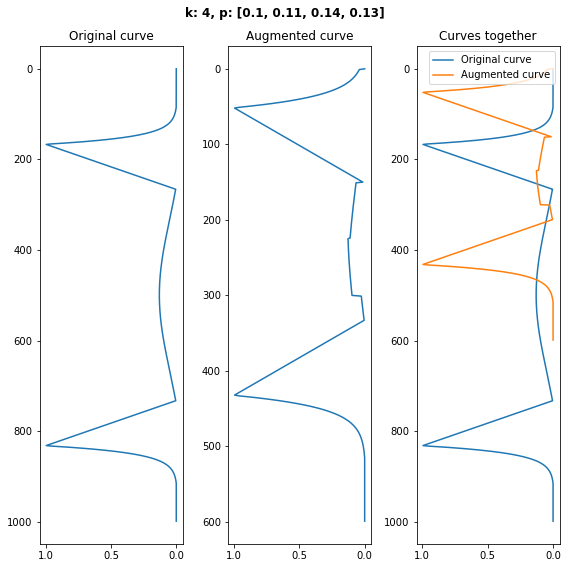

In [17]:
drop_regions_augmentation = DropRandomRegions(p=(0.05, 0.15), k=4)
drop_regions_augmentation.visualize(curve);

**ChangeAmplitude** augmentation does not affect the length of the curve, but increases or decreses the amplitude

Decrease the amplitude by 20%:

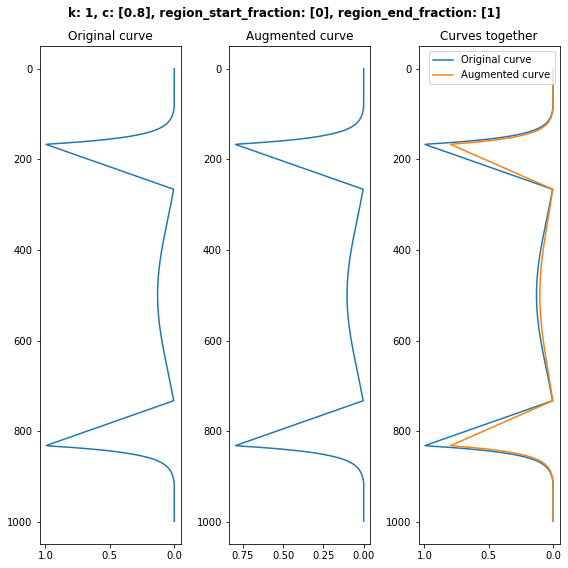

In [18]:
change_amplitude_augmentation = ChangeAmplitude(c=0.8, k=1)
change_amplitude_augmentation.visualize(curve);

Increase the amplitude by 50%:

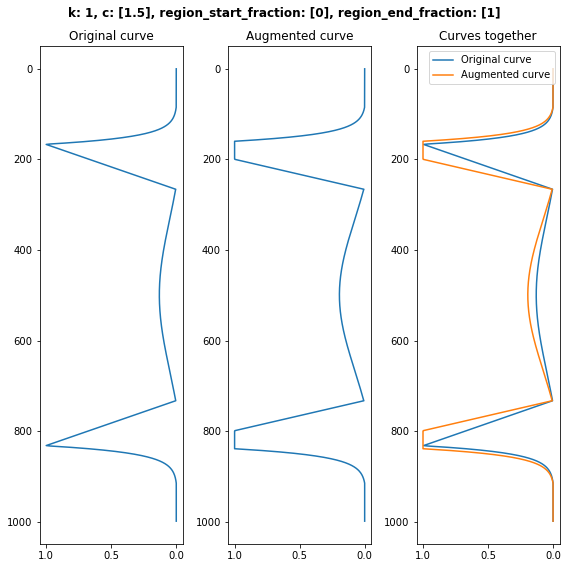

In [19]:
change_amplitude_augmentation = ChangeAmplitude(c=1.5, k=1, clip=(0, 1))
change_amplitude_augmentation.visualize(curve);

Increase amplitude of 3 random regions to 50%:

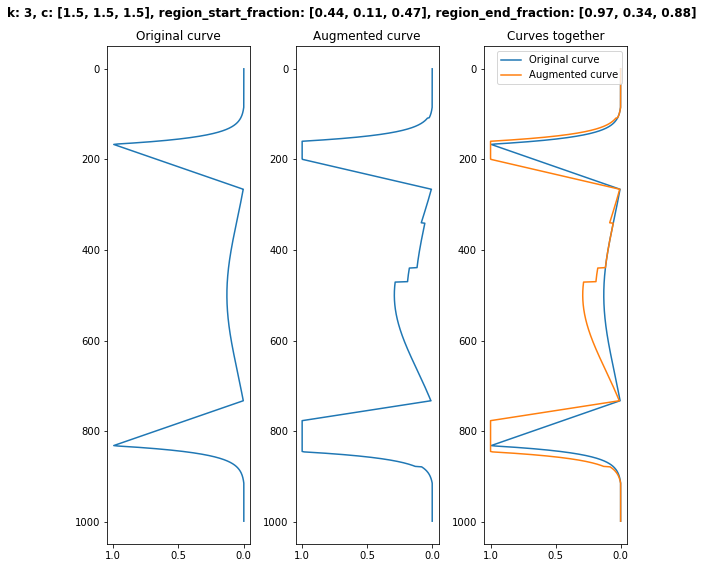

In [20]:
change_amplitude_augmentation = ChangeAmplitude(
    c=1.5, k=3, region_start_fraction=(0, 0.5), region_end_fraction=(0.6, 1), clip=(0, 1))
change_amplitude_augmentation.visualize(curve);

Randomly generate coefficient for changing amplitude from 0.8 to 1.2. Somewhere the amplitude will decrease, somewhere it will increase:

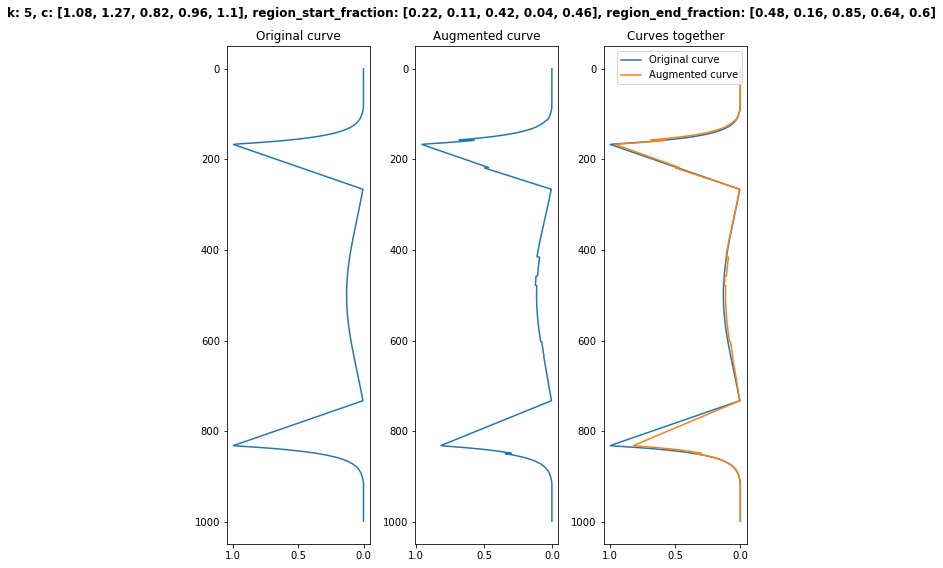

In [21]:
change_amplitude_augmentation = ChangeAmplitude(
    c=(0.8, 1.3), k=5, region_start_fraction=(0, 0.5), region_end_fraction=(0.6, 1), clip=(0, 1))
change_amplitude_augmentation.visualize(curve);